In [1]:
import sys

sys.path.append('../../')

In [2]:
from finance.discountfactor import ConstantRateDiscountFactor 

r = 0.02
discount = ConstantRateDiscountFactor(r)

In [3]:
import numpy as np
from maths.montecarlo.processes.brownianmotions import BrownianMotion

maturity = 5.
step = 1./360
time_grid = BrownianMotion.generate_time_grid(0, maturity, step)

x_0 = [100, 100]
mu_s = [[5], [4]]
sigma_s = [[10], [6]]

correl = [[1, 0], [0, 1]]

b = BrownianMotion(time_grid, x_0, mu_s, sigma_s, correl)
print b.values[:, 0]
print b(0)

[ 100.  100.]
[[ 100.]
 [ 100.]]


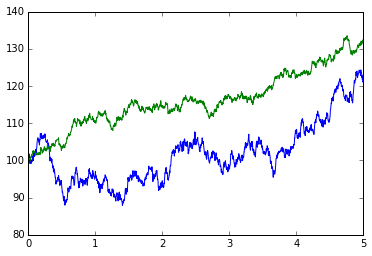

In [4]:
%matplotlib inline

b.plot()

In [5]:
from finance.products.european.assetswap import (
    SwapContract,
)

delta = 0.25
coupon_dates = SwapContract.generate_payment_dates(0, maturity, delta)

swap = SwapContract(b, discount, coupon_dates)
print swap

Swap contract of maturity T = 5 years, over S^0 with strike K = 104.821, paying at {0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00}


In [6]:
from risk.basel.exposures import EuropeanBaselBrownianExposure, EuropeanBaselGeometricBrownianExposure

In [7]:
exposure = EuropeanBaselBrownianExposure(swap)

exposure(t=1., risk_horizon=1., risk_period=5./360,
         conf_level=0.8, 
         drift=mu_s[0][0], vol=sigma_s[0][0])

array([ 10.36700793,  29.64027021])

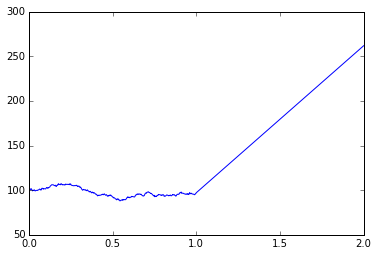

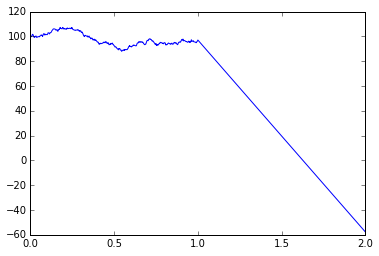

In [8]:
for p in exposure.processes:
    p.plot()

In [9]:
exposure = EuropeanBaselGeometricBrownianExposure(swap)

exposure(t=1., risk_horizon=1., risk_period=5./360,
         conf_level=0.8, 
         drift=mu_s[0][0]/100., vol=sigma_s[0][0]/100.)

array([ 33.51799318,  18.34421562])

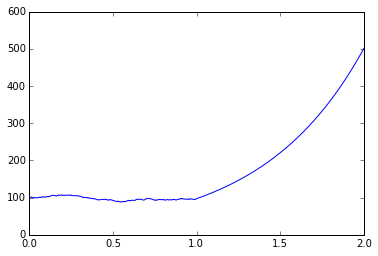

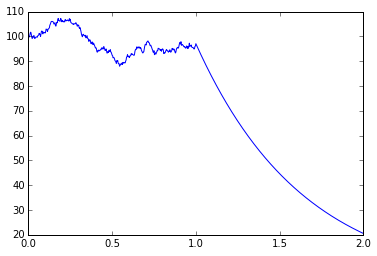

In [10]:
for p in exposure.processes:
    p.plot()